## 1. Load Libraries

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 2. Load Datasets

In [121]:
# Load the data with specified encoding
purchase_behavior = pd.read_csv('QVI_purchase_behaviour.csv')
transaction_data = pd.read_csv('QVI_transaction_data.csv')  

In [122]:
# Create a copy of the original DataFrame
original_transaction_data = transaction_data.copy()

 ## 3. Exploratory Data Analysis on Transaction Data

###   3.1 Examine the format of each column using `info()`. 

In [123]:
# Display basic information about the data
print("Purchase Behavior Data:")
print(purchase_behavior.info())

print("Transaction Data:")
print(transaction_data.info())

Purchase Behavior Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None
Transaction Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  flo

###   3.2 Convert the 'DATE' column to a date format.

In [124]:
transaction_data['DATE'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(transaction_data['DATE'], unit='D')

print("Transaction Data:")
print(transaction_data.info())

Transaction Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB
None


The DATE variable within Transaction_Data table is a certain form of Excel serial date format. In this format, the integer part represents the number of days since the start date (usually December 30, 1899), and the fractional part represents the fraction of the day.

### 3.3 Generate a summary of the 'PROD_NAME' column with a word frequency analysis.

In [125]:
# Unique values and counts in 'PROD_NAME'
product_counts = transaction_data['PROD_NAME'].value_counts()
print(product_counts)

# Word frequency analysis
words = transaction_data['PROD_NAME'].str.split().explode()
word_counts = words.value_counts()
print(word_counts)



PROD_NAME
Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: count, Length: 114, dtype: int64
PROD_NAME
175g        60561
Chips       49770
150g        41633
Kettle      41288
&           35565
            ...  
Sunbites     1432
Pc           1431
NCC          1419
Garden       1419
Fries        1418
Name: count, Length: 220, dtype: int64


### 3.4  Examine individual words in 'PROD_NAME' and remove digits and special characters.

In [126]:
import re

# Extract individual words from 'PROD_NAME' and create a DataFrame
words_df = transaction_data['PROD_NAME'].str.split(expand=True).stack().to_frame()
words_df.columns = ['words']

# Remove digits and special characters from the words
words_df['words_cleaned'] = words_df['words'].str.replace('[^a-zA-Z0-9\s]', '', regex=True)

# Remove words with digits and special characters
filtered_words = words_df[~words_df['words_cleaned'].str.isdigit()]

# Join cleaned words back into the original DataFrame
transaction_data['PROD_NAME_CLEANED'] = filtered_words.groupby(level=0)['words_cleaned'].apply(' '.join)

# Remove rows containing the word 'salsa' in 'PROD_NAME_CLEANED'
transaction_data = transaction_data[~transaction_data['PROD_NAME_CLEANED'].str.contains('salsa', case=False)]

# Reset index after removing rows
transaction_data.reset_index(drop=True, inplace=True)

# Display the modified dataset
print(transaction_data.head(10))



        DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 2018-10-17          1            1000       1         5   
1 2019-05-14          1            1307     348        66   
2 2019-05-20          1            1343     383        61   
3 2018-08-17          2            2373     974        69   
4 2018-08-18          2            2426    1038       108   
5 2019-05-16          4            4149    3333        16   
6 2019-05-16          4            4196    3539        24   
7 2018-08-20          5            5026    4525        42   
8 2018-08-18          7            7150    6900        52   
9 2019-05-17          7            7215    7176        16   

                                  PROD_NAME  PROD_QTY  TOT_SALES  \
0    Natural Chip        Compny SeaSalt175g         2        6.0   
1                  CCs Nacho Cheese    175g         3        6.3   
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9   
3    Smiths Chip Thinly  S/Cream&Onion 175g         5   

Extracted individual words from the 'PROD_NAME' column and created a DataFrame.

Counted the occurrences of each cleaned word.

Displayed the most common words sorted by frequency.


### 3.5  Remove salsa products from the dataset.

In [127]:
# Remove rows containing the word 'salsa' in 'PROD_NAME'
transaction_data = transaction_data[~transaction_data['PROD_NAME'].str.contains('salsa', case=False)]

# Reset index after removing rows
transaction_data.reset_index(drop=True, inplace=True)

# Display the modified dataset
print(transaction_data.head(10))


        DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 2018-10-17          1            1000       1         5   
1 2019-05-14          1            1307     348        66   
2 2019-05-20          1            1343     383        61   
3 2018-08-17          2            2373     974        69   
4 2018-08-18          2            2426    1038       108   
5 2019-05-16          4            4149    3333        16   
6 2019-05-16          4            4196    3539        24   
7 2018-08-20          5            5026    4525        42   
8 2018-08-18          7            7150    6900        52   
9 2019-05-17          7            7215    7176        16   

                                  PROD_NAME  PROD_QTY  TOT_SALES  \
0    Natural Chip        Compny SeaSalt175g         2        6.0   
1                  CCs Nacho Cheese    175g         3        6.3   
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9   
3    Smiths Chip Thinly  S/Cream&Onion 175g         5   

### 3.6   Check for nulls and outliers within 'PROD_QTY', investigate outliers, and filter out an outlier customer.

In [128]:
# Display summary statistics for transaction_data
print("\nSummary Statistics for Transaction Data:")
print(transaction_data.describe())


Summary Statistics for Transaction Data:
                                DATE      STORE_NBR  LYLTY_CARD_NBR  \
count                         246742  246742.000000    2.467420e+05   
mean   2018-12-30 01:19:01.211467520     135.051098    1.355310e+05   
min              2018-07-01 00:00:00       1.000000    1.000000e+03   
25%              2018-09-30 00:00:00      70.000000    7.001500e+04   
50%              2018-12-30 00:00:00     130.000000    1.303670e+05   
75%              2019-03-31 00:00:00     203.000000    2.030840e+05   
max              2019-06-30 00:00:00     272.000000    2.373711e+06   
std                              NaN      76.787096    8.071528e+04   

             TXN_ID       PROD_NBR       PROD_QTY      TOT_SALES  
count  2.467420e+05  246742.000000  246742.000000  246742.000000  
mean   1.351311e+05      56.351789       1.908062       7.321322  
min    1.000000e+00       1.000000       1.000000       1.700000  
25%    6.756925e+04      26.000000       2.000000 

Summary statistics of 'PROD_QTY':
count    246742.000000
mean          1.908062
std           0.659831
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max         200.000000
Name: PROD_QTY, dtype: float64


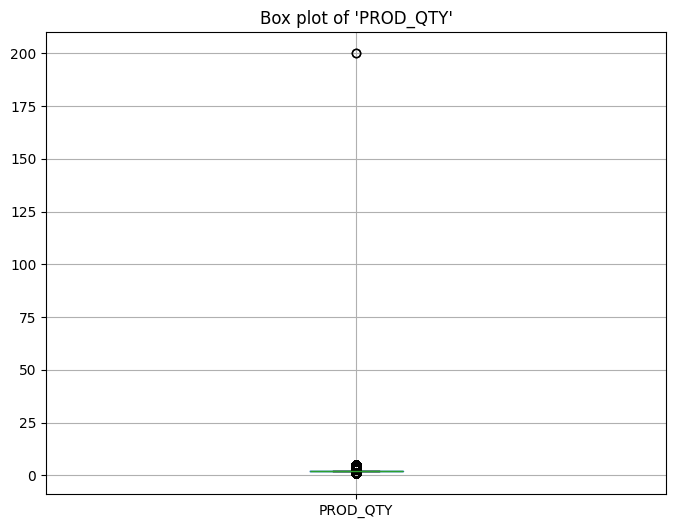

Transactions with high 'PROD_QTY':
            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
64955 2018-08-19        226          226000  226201         4   
64956 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  \
64955  Dorito Corn Chp     Supreme 380g       200      650.0   
64956  Dorito Corn Chp     Supreme 380g       200      650.0   

                  PROD_NAME_CLEANED  
64955  Dorito Corn Chp Supreme 380g  
64956  Dorito Corn Chp Supreme 380g  


In [129]:
# Display summary statistics of 'PROD_QTY'
print("Summary statistics of 'PROD_QTY':")
print(transaction_data['PROD_QTY'].describe())

# Create a box plot to visualize the distribution of 'PROD_QTY'
plt.figure(figsize=(8, 6))
transaction_data.boxplot(column='PROD_QTY')
plt.title("Box plot of 'PROD_QTY'")
plt.show()

# Identify transactions with 'PROD_QTY' greater than a certain threshold (e.g., 50)
outliers = transaction_data[transaction_data['PROD_QTY'] > 50]

# Display transactions with high 'PROD_QTY'
print("Transactions with high 'PROD_QTY':")
print(outliers)

In [130]:
loyalty_card_to_exclude = 226000

# Filter out transactions associated with the specified loyalty card number
filtered_data = transaction_data[transaction_data['LYLTY_CARD_NBR'] != loyalty_card_to_exclude]

### 3.7   Examine the number of transactions over time and identify missing dates.   

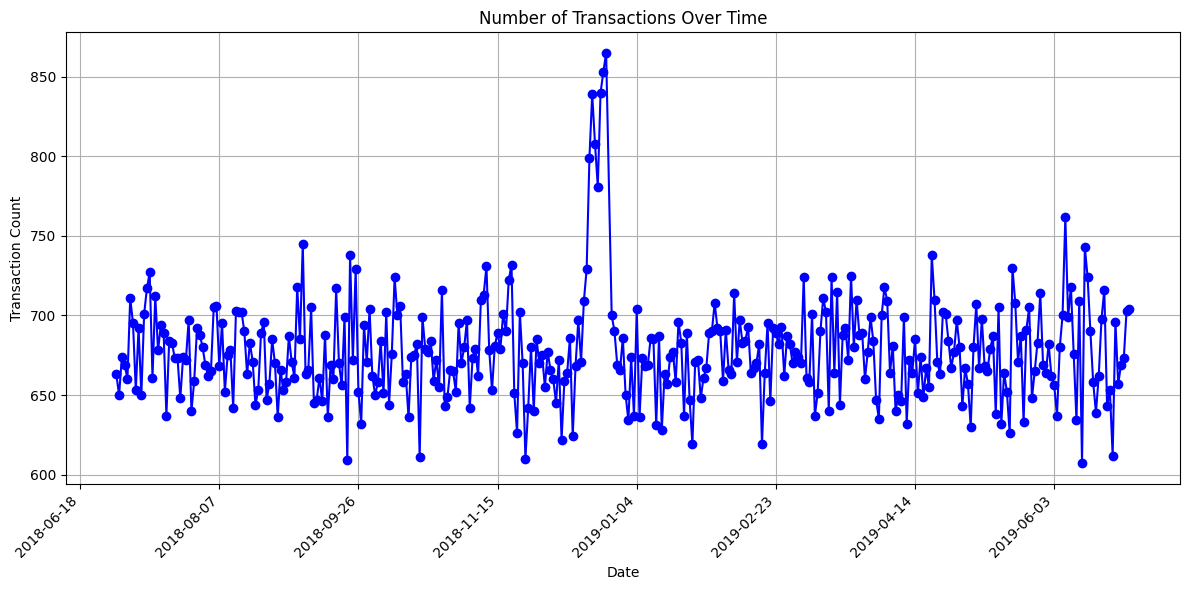

Missing Dates:
DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq='D')


In [131]:
# Group by 'DATE' and count the number of transactions for each date
transactions_over_time = transaction_data.groupby('DATE').size().reset_index(name='transaction_count')

# Create a date range covering the entire period of your dataset
date_range = pd.date_range(start=transactions_over_time['DATE'].min(), end=transactions_over_time['DATE'].max(), freq='D')

# Identify missing dates
missing_dates = date_range[~date_range.isin(transactions_over_time['DATE'])]

# Display the number of transactions over time
plt.figure(figsize=(12, 6))
plt.plot(transactions_over_time['DATE'], transactions_over_time['transaction_count'], marker='o', linestyle='-', color='b')
plt.title('Number of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.grid(True)

# Format the date labels on the x-axis
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=10))  # Adjust the number of bins as needed
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

plt.tight_layout()
plt.show()

# Display missing dates
print("Missing Dates:")
print(missing_dates)


Looks like there is an outlier around December though we could easily attribute that to Customers splurging for Christmas furthermore there is a missing date on Christmas Day which makes the graph seem more extreme but all we have to do is just remove the day from anlaysis. 

In [132]:
# Identify the outlier date
outlier_date = pd.to_datetime('2018-12-25')

# Filter out the outlier date
filtered_transaction_data = transaction_data[transaction_data['DATE'] != outlier_date]


## 4.   Feature Engineering on Transaction Data

### 4.1   Create a histogram of pack sizes.

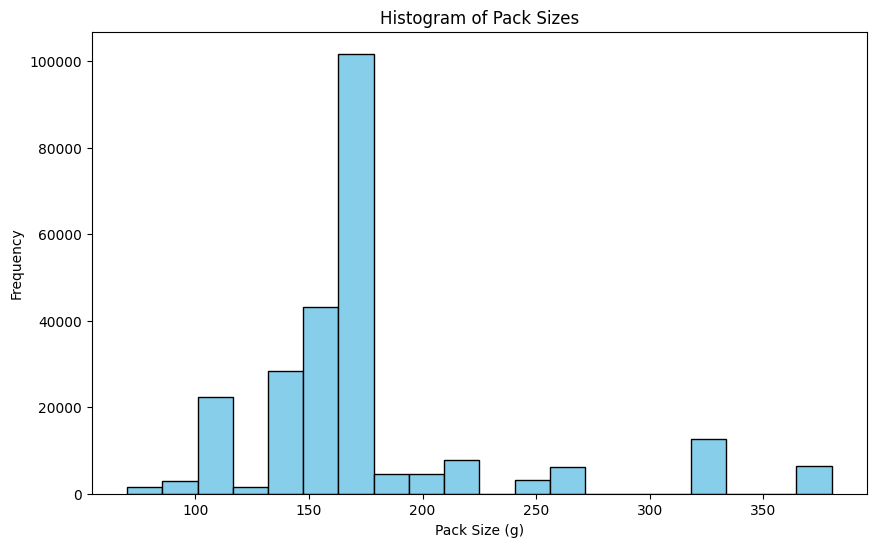

In [133]:
# Extract pack sizes from 'PROD_NAME'
transaction_data['PACK_SIZE'] = transaction_data['PROD_NAME'].str.extract('(\d+)').astype(float)

# Create a histogram of pack sizes
plt.figure(figsize=(10, 6))
plt.hist(transaction_data['PACK_SIZE'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Pack Sizes')
plt.xlabel('Pack Size (g)')
plt.ylabel('Frequency')
plt.show()

There does not seem to be anything too unreasonable packsize-wise, I wouldn't buy 80grams of chips though! Furthermore it seems salsa is definitely out of the equation!

### 4.2   Create a column for brand names and clean brand names.

In [134]:
# Extract brand names from 'PROD_NAME'
transaction_data['BRAND'] = transaction_data['PROD_NAME'].str.split().str[0]

# Display the unique brand names
unique_brands = transaction_data['BRAND'].unique()
print("Unique Brands:", unique_brands)

Unique Brands: ['Natural' 'CCs' 'Smiths' 'Kettle' 'Grain' 'Doritos' 'Twisties' 'WW'
 'Thins' 'Burger' 'NCC' 'Cheezels' 'Infzns' 'Red' 'Pringles' 'Dorito'
 'Infuzions' 'Smith' 'GrnWves' 'Tyrrells' 'Cobs' 'French' 'RRD' 'Tostitos'
 'Cheetos' 'Woolworths' 'Snbts' 'Sunbites']


In [135]:
# Extract brand names from 'PROD_NAME'
transaction_data['BRAND'] = transaction_data['PROD_NAME'].str.split().str[0]

# Mapping dictionary for brand name standardization
brand_mapping = {
    'Natural': 'Natural Chip Company',
    'CCs': 'CC\'s ',
    'Smiths': 'Smith\'s',
    'Kettle': 'Kettle',
    'Grain': 'Grainwaves',
    'Doritos': 'Doritos',
    'Twisties': 'Twisties',
    'WW': 'Woolworths',
    'Thins': 'Thins',
    'Burger': 'Burger',  # Replace with an appropriate name
    'NCC': 'Natural Chip Company',
    'Cheezels': 'Cheezels',
    'Infzns': 'Infuzions',
    'Red': 'Red Rock Deli',
    'Pringles': 'Pringles',
    'Dorito': 'Doritos',
    'Infuzions': 'Infuzions',
    'Smith': 'Smith\'s',
    'GrnWves': 'Grainwaves',
    'Tyrrells': 'Tyrrells',
    'Cobs': 'Cobs',
    'French': 'French', 
    'RRD': 'Red Rock Deli',
    'Tostitos': 'Tostitos',
    'Cheetos': 'Cheetos',
    'Woolworths': 'Woolworths',
    'Snbts': 'Sunbites',
    'Sunbites': 'Sunbites'
}

# Replace brand names using the mapping dictionary
transaction_data['BRAND'] = transaction_data['BRAND'].replace(brand_mapping)

# Display the unique brand names after cleaning
unique_brands_cleaned = transaction_data['BRAND'].unique()
print("Unique Brands (After Cleaning):", unique_brands_cleaned)

Unique Brands (After Cleaning): ['Natural Chip Company' "CC's " "Smith's" 'Kettle' 'Grainwaves' 'Doritos'
 'Twisties' 'Woolworths' 'Thins' 'Burger' 'Cheezels' 'Infuzions'
 'Red Rock Deli' 'Pringles' 'Tyrrells' 'Cobs' 'French' 'Tostitos'
 'Cheetos' 'Sunbites']


## 5.   Exploratory Data Analysis on Customer Data

###  5.1  Merge transaction_data  with customer_data 

In [136]:
# Merge the two datasets using 'LYLTY_CARD_NBR' as the primary key
merged_data = pd.merge(transaction_data, purchase_behavior, on='LYLTY_CARD_NBR', how='left')

# Display the merged dataset
print(merged_data.head())


        DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 2018-10-17          1            1000       1         5   
1 2019-05-14          1            1307     348        66   
2 2019-05-20          1            1343     383        61   
3 2018-08-17          2            2373     974        69   
4 2018-08-18          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  \
0    Natural Chip        Compny SeaSalt175g         2        6.0   
1                  CCs Nacho Cheese    175g         3        6.3   
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9   
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0   
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8   

                         PROD_NAME_CLEANED  PACK_SIZE                 BRAND  \
0          Natural Chip Compny SeaSalt175g      175.0  Natural Chip Company   
1                    CCs Nacho Cheese 175g      175.0             

###  5.2 Check for missing customer details.

In [137]:
# Check for missing customer details in the merged dataset
missing_customers = merged_data[merged_data['LIFESTAGE'].isnull() | merged_data['PREMIUM_CUSTOMER'].isnull()]

# Display the rows with missing customer details
print("Transactions with missing customer details:")
print(missing_customers)


Transactions with missing customer details:
Empty DataFrame
Columns: [DATE, STORE_NBR, LYLTY_CARD_NBR, TXN_ID, PROD_NBR, PROD_NAME, PROD_QTY, TOT_SALES, PROD_NAME_CLEANED, PACK_SIZE, BRAND, LIFESTAGE, PREMIUM_CUSTOMER]
Index: []


## 6.   Data Analysis on Customer Segments

### 6.1 Total sales by LIFESTAGE and PREMIUM_CUSTOMER

Total Sales by LIFESTAGE and PREMIUM_CUSTOMER:
                 LIFESTAGE PREMIUM_CUSTOMER  TOT_SALES
0   MIDAGE SINGLES/COUPLES           Budget   33345.70
1   MIDAGE SINGLES/COUPLES       Mainstream   84734.25
2   MIDAGE SINGLES/COUPLES          Premium   54443.85
3             NEW FAMILIES           Budget   20607.45
4             NEW FAMILIES       Mainstream   15979.70
5             NEW FAMILIES          Premium   10760.80
6           OLDER FAMILIES           Budget  156863.75
7           OLDER FAMILIES       Mainstream   96413.55
8           OLDER FAMILIES          Premium   76542.60
9    OLDER SINGLES/COUPLES           Budget  127833.60
10   OLDER SINGLES/COUPLES       Mainstream  124648.50
11   OLDER SINGLES/COUPLES          Premium  123537.55
12                RETIREES           Budget  105916.30
13                RETIREES       Mainstream  145168.95
14                RETIREES          Premium   91296.65
15          YOUNG FAMILIES           Budget  129717.95
16          YOUNG 

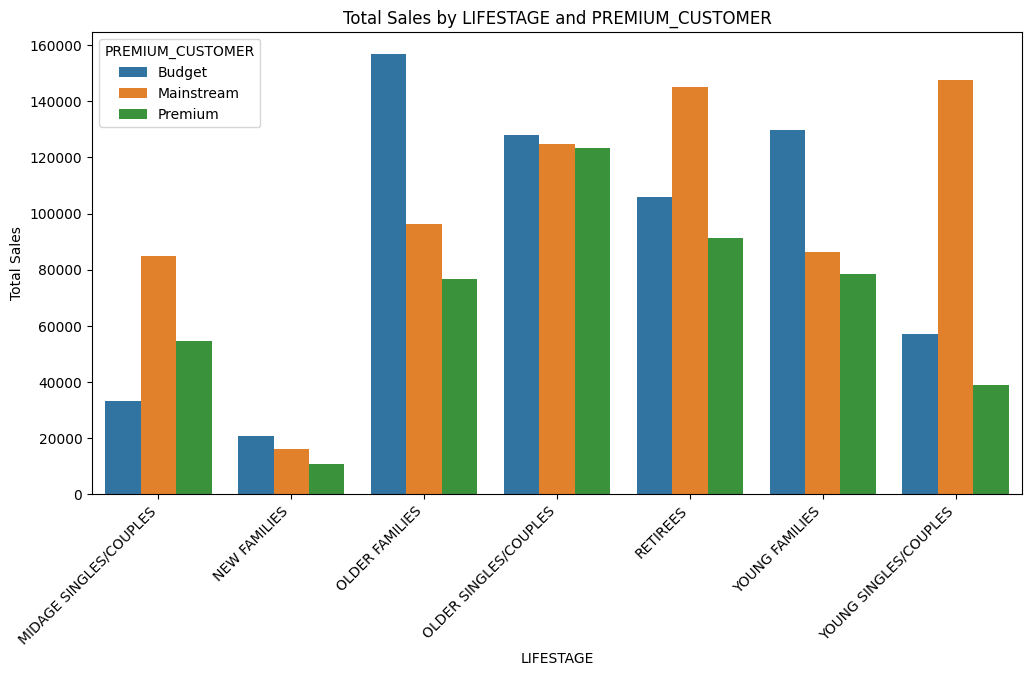

In [138]:
# Calculate total sales by LIFESTAGE and PREMIUM_CUSTOMER
total_sales_by_customer_segment = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

# Display the result
print("Total Sales by LIFESTAGE and PREMIUM_CUSTOMER:")
print(total_sales_by_customer_segment)


# Set up the figure and axis
plt.figure(figsize=(12, 6))

# Plot the total sales by LIFESTAGE and PREMIUM_CUSTOMER
sns.barplot(x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER', data=total_sales_by_customer_segment)
plt.title('Total Sales by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xlabel('LIFESTAGE')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.legend(title='PREMIUM_CUSTOMER')

# Show the plot
plt.show()

### 6.2 Calculate the number of customers by LIFESTAGE and PREMIUM_CUSTOMER and plot the results.

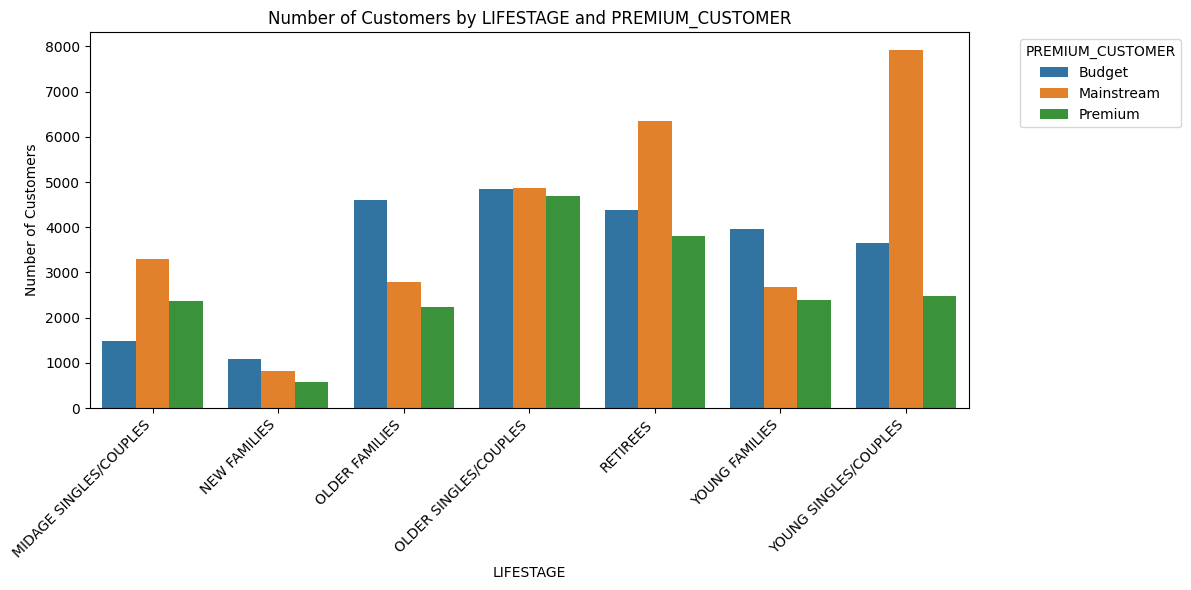

In [139]:
# Calculate the number of customers by LIFESTAGE and PREMIUM_CUSTOMER
customer_count_by_segment = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()
customer_count_by_segment = customer_count_by_segment.rename(columns={'LYLTY_CARD_NBR': 'Customer_Count'})

# Set up the figure and axis
plt.figure(figsize=(12, 6))

# Plot the number of customers by LIFESTAGE and PREMIUM_CUSTOMER
sns.barplot(x='LIFESTAGE', y='Customer_Count', hue='PREMIUM_CUSTOMER', data=customer_count_by_segment)
plt.title('Number of Customers by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xlabel('LIFESTAGE')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Move the legend to the upper left corner outside the plot area
plt.legend(title='PREMIUM_CUSTOMER', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the layout to make room for the legend
plt.tight_layout()

# Show the plot
plt.show()


### 6.3   Calculate the average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER and plot the results.

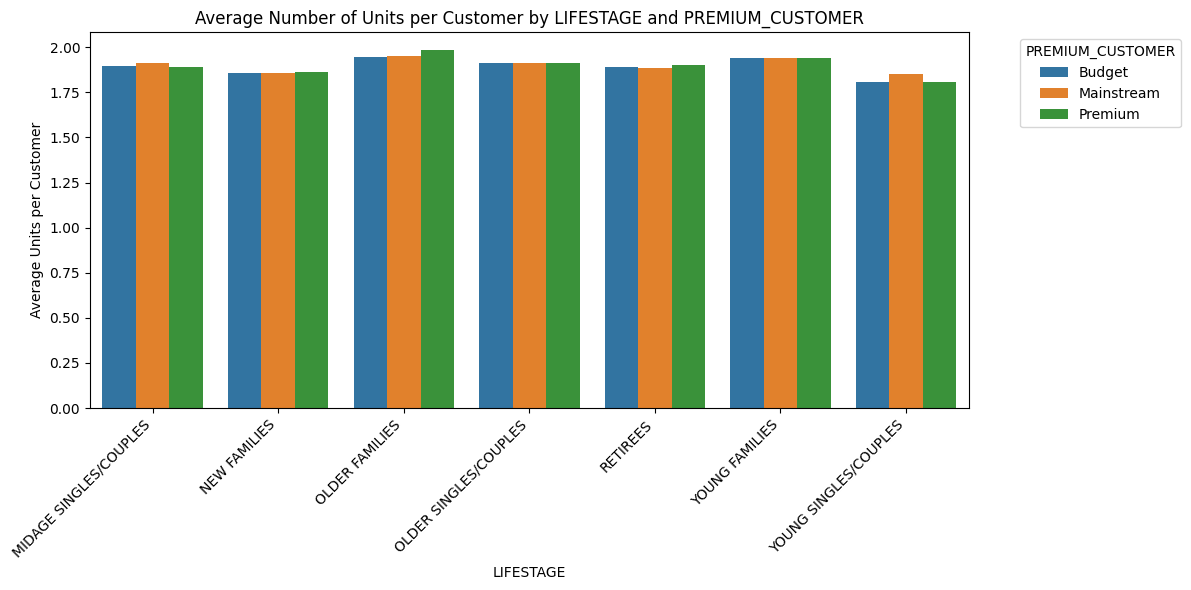

In [140]:
# Calculate average number of units per customer
avg_units_per_customer = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].mean().reset_index()

# Set up the figure and axis
plt.figure(figsize=(12, 6))

# Plot the average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER
sns.barplot(x='LIFESTAGE', y='PROD_QTY', hue='PREMIUM_CUSTOMER', data=avg_units_per_customer)
plt.title('Average Number of Units per Customer by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xlabel('LIFESTAGE')
plt.ylabel('Average Units per Customer')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Move the legend to the upper left corner outside the plot area
plt.legend(title='PREMIUM_CUSTOMER', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the layout to make room for the legend
plt.tight_layout()

# Show the plot
plt.show()


### 6.4   Calculate the average price per unit by LIFESTAGE and PREMIUM_CUSTOMER and plot the results.

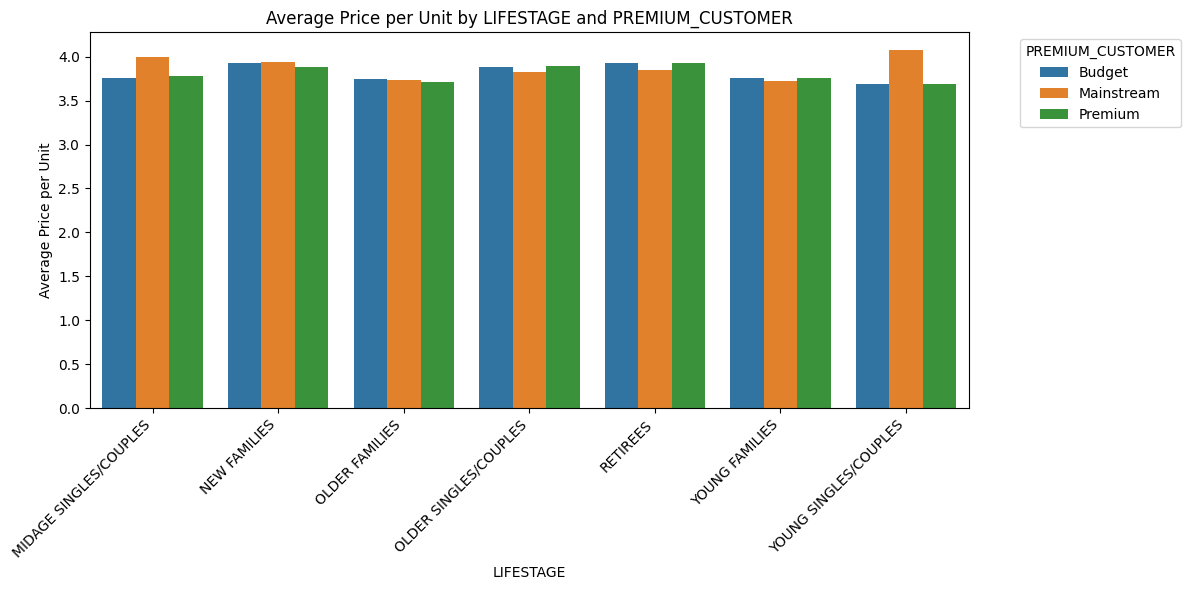

In [141]:
# Calculate average price per unit by LIFESTAGE and PREMIUM_CUSTOMER
avg_price_per_unit = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].mean() / merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].mean()
avg_price_per_unit = avg_price_per_unit.reset_index(name='Average_Price_Per_Unit')

# Assuming 'Average_Price_Per_Unit' is in object format, convert it to numeric
avg_price_per_unit['Average_Price_Per_Unit'] = pd.to_numeric(avg_price_per_unit['Average_Price_Per_Unit'], errors='coerce')

# Set up the figure and axis
plt.figure(figsize=(12, 6))

# Plot the average price per unit by LIFESTAGE and PREMIUM_CUSTOMER
sns.barplot(x='LIFESTAGE', y='Average_Price_Per_Unit', hue='PREMIUM_CUSTOMER', data=avg_price_per_unit)
plt.title('Average Price per Unit by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xlabel('LIFESTAGE')
plt.ylabel('Average Price per Unit')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Move the legend to the upper left corner outside the plot area
plt.legend(title='PREMIUM_CUSTOMER', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the layout to make room for the legend
plt.tight_layout()

# Show the plot
plt.show()


### 6.5 Conduct an independent t-test to assess the significance of the price per unit difference.

In [144]:
from scipy.stats import ttest_ind

# Separate data into two groups (e.g., Mainstream and Premium)
mainstream_data = avg_price_per_unit[avg_price_per_unit['PREMIUM_CUSTOMER'] == 'Mainstream']['Average_Price_Per_Unit']
premium_data = avg_price_per_unit[avg_price_per_unit['PREMIUM_CUSTOMER'] == 'Premium']['Average_Price_Per_Unit']

# Perform independent t-test
t_statistic, p_value = ttest_ind(mainstream_data, premium_data, equal_var=False)

# Display results
print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')

# Check significance
alpha = 0.05
if p_value < alpha:
    print("Rejected the null hypothesis. There is a significant difference in average price per unit between Mainstream and Premium customers.")
else:
    print("Failed to reject the null hypothesis. There is no significant difference in average price per unit between Mainstream and Premium customers.")


T-Statistic: 1.1431735893360464
P-Value: 0.2774100285361897
Failed to reject the null hypothesis. There is no significant difference in average price per unit between Mainstream and Premium customers.


## 7. Deep Dive Into Customer Segment

We can conclude that the absence of nulls within the LYLTY_CARD_NBR column indicate that every transaction made in that table is a purchase used with a loyalty card number.